In [1]:
#################################### HW1 ############################################

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from skimpy import skim
import numpy as np

df = pd.read_csv('Baltimore911.csv')

C:\Users\14104\AppData\Local\Temp\ipykernel_15820\2956114256.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


In [3]:
# 1) Create a dataset profile table that gives an overview of the dataset.

In [4]:
# number of rows

no_rows = len(df)
print("no. of rows: ", no_rows)

no. of rows:  292761


In [5]:
# number of columns

no_colms = len(df.columns)
print("no. of columns: ", no_colms)

no. of columns:  16


In [6]:
dtype_dict = {
    'CrimeDate': 'category',
    'CrimeTime': 'category',
    'CrimeCode': 'category',
    'Location': 'category',
    'Description': 'category',
    'Inside/Outside': 'category',
    'Weapon': 'category',
    'Post': 'category',
    'District': 'category',
    'Neighborhood': 'category',
    'Premise': 'category',
    'vri_name1': 'category'
}

df = df.astype(dtype_dict)

In [7]:
# data types - categorical variables refers to discrete features. Integer and float variables refer to numerical features.

data_types = df.dtypes
data_types

CrimeDate          category
CrimeTime          category
CrimeCode          category
Location           category
Description        category
Inside/Outside     category
Weapon             category
Post               category
District           category
Neighborhood       category
Longitude           float64
Latitude            float64
Location 1          float64
Premise            category
vri_name1          category
Total Incidents       int64
dtype: object

In [8]:
# number of missing values

missing_values = ((df.isnull().sum()) * 100) / 292761
missing_values 

CrimeDate            0.000000
CrimeTime            0.008881
CrimeCode            0.000000
Location             0.456345
Description          0.000000
Inside/Outside      11.531591
Weapon              78.982173
Post                 0.811584
District             0.000000
Neighborhood         3.587910
Longitude            0.558476
Latitude             0.558476
Location 1         100.000000
Premise             11.617668
vri_name1           88.186951
Total Incidents      0.000000
dtype: float64

In [9]:
profile_table = df.describe().loc[['min','max','50%','mean','std']]
print(profile_table)

      Longitude   Latitude  Location 1  Total Incidents
min  -81.529189  37.577262         NaN              1.0
max  -76.383228  39.661332         NaN              1.0
50%  -76.613977  39.302672         NaN              1.0
mean -76.617452  39.306746         NaN              1.0
std    0.043734   0.029658         NaN              0.0


In [10]:
# number of unique values

unique_counts = df.nunique()
unique_counts

CrimeDate           2300
CrimeTime           1475
CrimeCode             81
Location           27064
Description           14
Inside/Outside         4
Weapon                 5
Post                 259
District              10
Neighborhood         278
Longitude          97440
Latitude           95903
Location 1             0
Premise              125
vri_name1              8
Total Incidents        1
dtype: int64

In [11]:
# Extract top 3 key-value pairs
sorted_items = sorted(unique_counts.items(), key=lambda x: x[1], reverse=True)
max_unique = sorted_items[:3]

# Convert it back to dictionary if needed
top_3_unique = dict(max_unique)

print(top_3_unique)

{'Longitude': 97440, 'Latitude': 95903, 'Location': 27064}


In [12]:
profile_df = pd.DataFrame({
    'Number of rows': no_rows,
    'Number of columns': no_colms,
    'Data Type': data_types,
    'Missing Values (% rows)': missing_values,
    'Unique Values': unique_counts,
    'Largest Counts': top_3_unique
})

# Optionally merge with the describe() output
full_profile = profile_df.join(profile_table.transpose(), how="outer")
full_profile.replace(np.nan, ' ')
print(full_profile)

                 Number of rows  Number of columns Data Type  \
CrimeCode                292761                 16  category   
CrimeDate                292761                 16  category   
CrimeTime                292761                 16  category   
Description              292761                 16  category   
District                 292761                 16  category   
Inside/Outside           292761                 16  category   
Latitude                 292761                 16   float64   
Location                 292761                 16  category   
Location 1               292761                 16   float64   
Longitude                292761                 16   float64   
Neighborhood             292761                 16  category   
Post                     292761                 16  category   
Premise                  292761                 16  category   
Total Incidents          292761                 16     int64   
Weapon                   292761         

In [13]:
# surprising / strange / unique information from profile table:
# There is no data in the 'Location 1' column at all. It is surprising that why is the column is even there.

In [14]:
# 2) Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall 
# crime incidence aggregating from all geo-locations;

In [15]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

In [16]:
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.dayofweek  # 0: Monday, 1: Tuesday, ..., 6: Sunday

In [17]:
yearly_counts = df.groupby('year').size()
yearly_counts

year
1963        1
1969        1
1975        1
1977        1
1978        1
1980        1
1981        1
1982        1
1985        1
1988        1
1993        2
1995        2
1998        2
1999        2
2000        3
2001        3
2003        1
2004        2
2006        1
2007        5
2008        5
2009        7
2010        3
2011        9
2012       10
2013       15
2014    45307
2015    48192
2016    48774
2017    52163
2018    48436
2019    45998
2020     3809
dtype: int64

In [18]:
monthly_counts = df.groupby('month').size()
monthly_counts

month
1     25680
2     19023
3     21036
4     23065
5     25692
6     25750
7     26358
8     26571
9     25641
10    26398
11    23921
12    23626
dtype: int64

In [19]:
day_counts = df.groupby('day_of_week').size()
day_counts

day_of_week
0    43017
1    42325
2    42036
3    41746
4    43661
5    40638
6    39338
dtype: int64

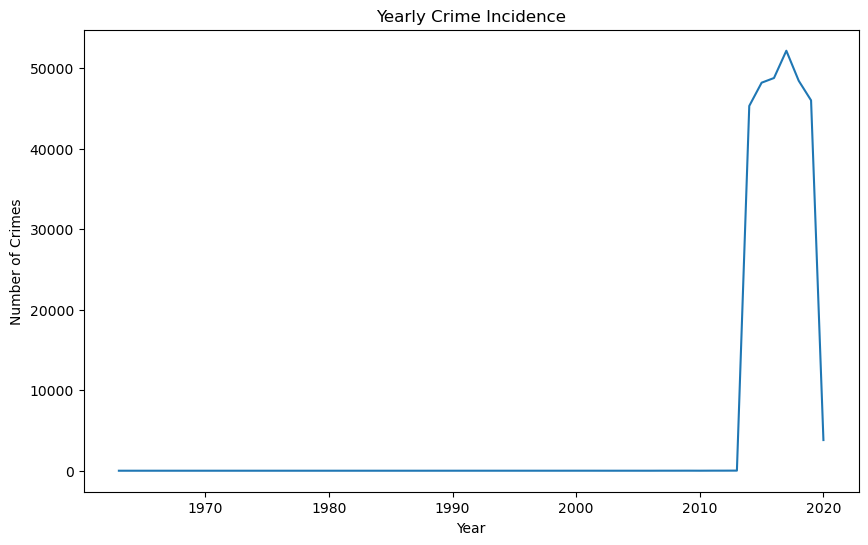

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line')
plt.title('Yearly Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

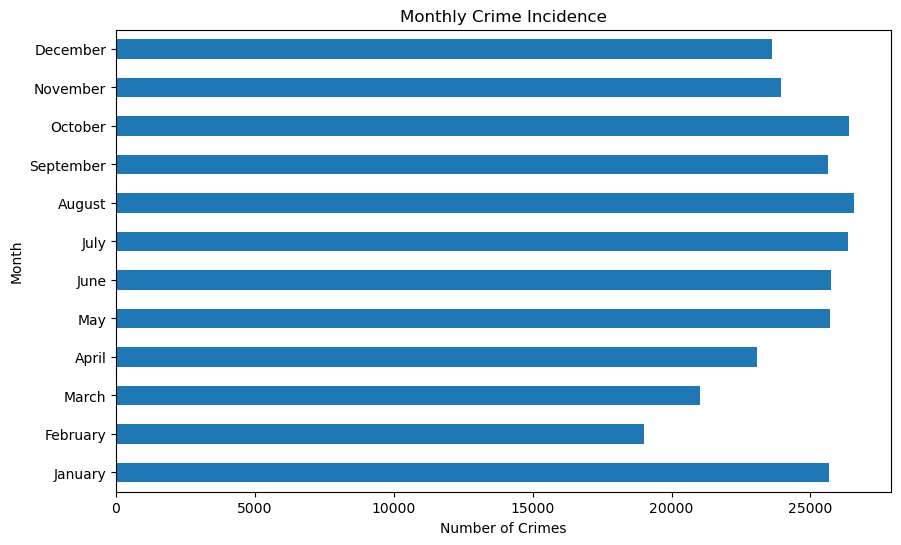

In [21]:
import matplotlib.pyplot as plt

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='barh')
plt.title('Monthly Crime Incidence')
plt.xlabel('Number of Crimes')
plt.ylabel('Month')
plt.yticks(ticks=range(12), labels=month_labels, rotation=0)
plt.show()

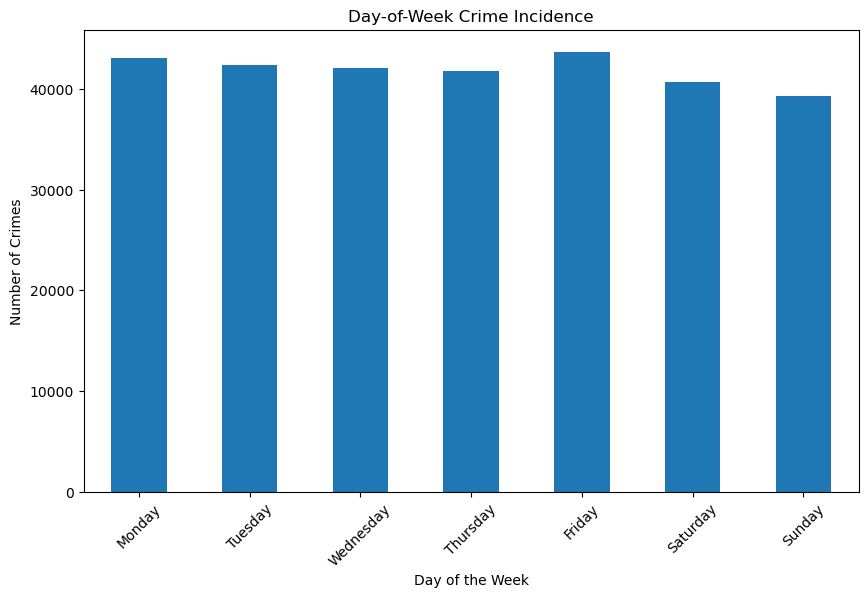

In [22]:
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(7), labels=dow_labels, rotation=45)
plt.show()

In [23]:
# 3) Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods.

In [24]:
# Aggregate data by crime_name
crime_counts = df.groupby('Description').size().sort_values(ascending=False)

C:\Users\14104\AppData\Local\Temp\ipykernel_15820\3758579467.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_counts = df.groupby('Description').size().sort_values(ascending=False)


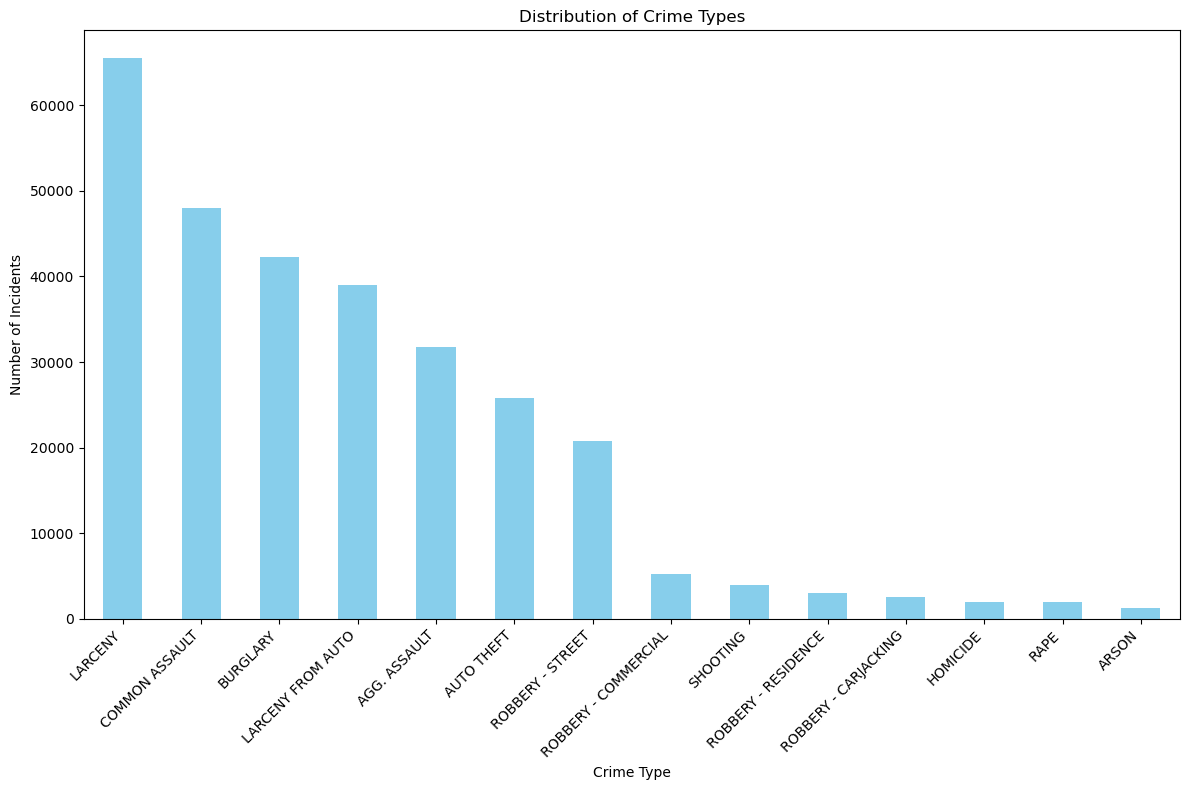

In [25]:
# Bar Plot
plt.figure(figsize=(12, 8))
crime_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [26]:
# 4) Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, 
# or by day-of-week aggregating across all locations.

C:\Users\14104\AppData\Local\Temp\ipykernel_15820\3330629365.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_data = df.groupby(['year', 'Description']).size().unstack().fillna(0)


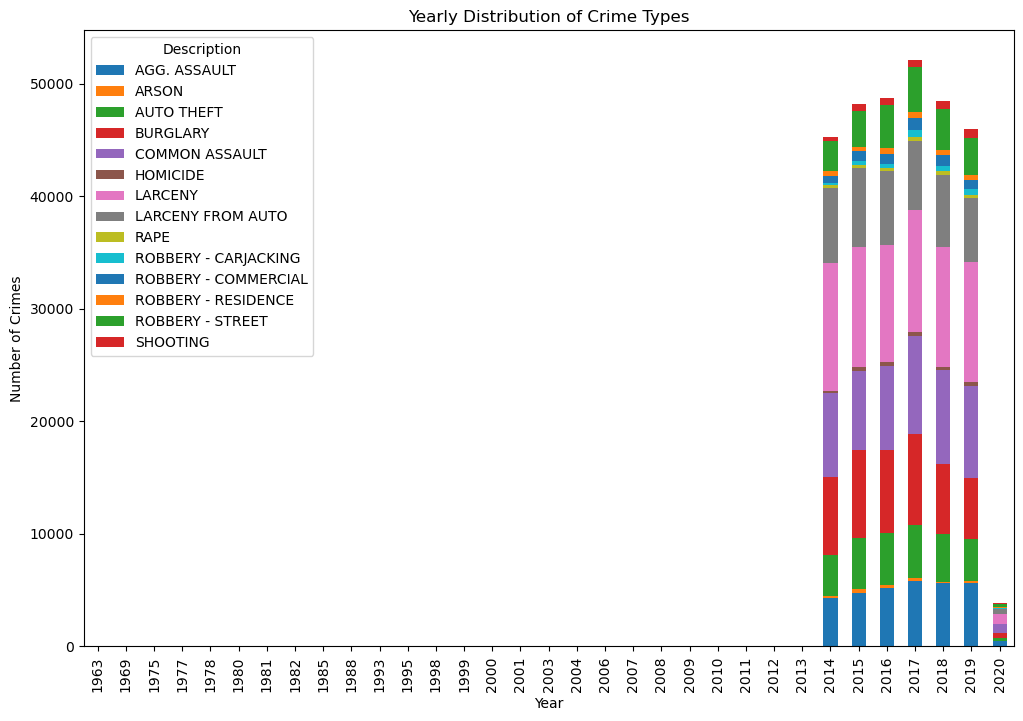

In [27]:
# year to year plot

yearly_data = df.groupby(['year', 'Description']).size().unstack().fillna(0)
yearly_data.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Yearly Distribution of Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\14104\AppData\Local\Temp\ipykernel_15820\3967548582.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby(['month', 'Description']).size().unstack().fillna(0)


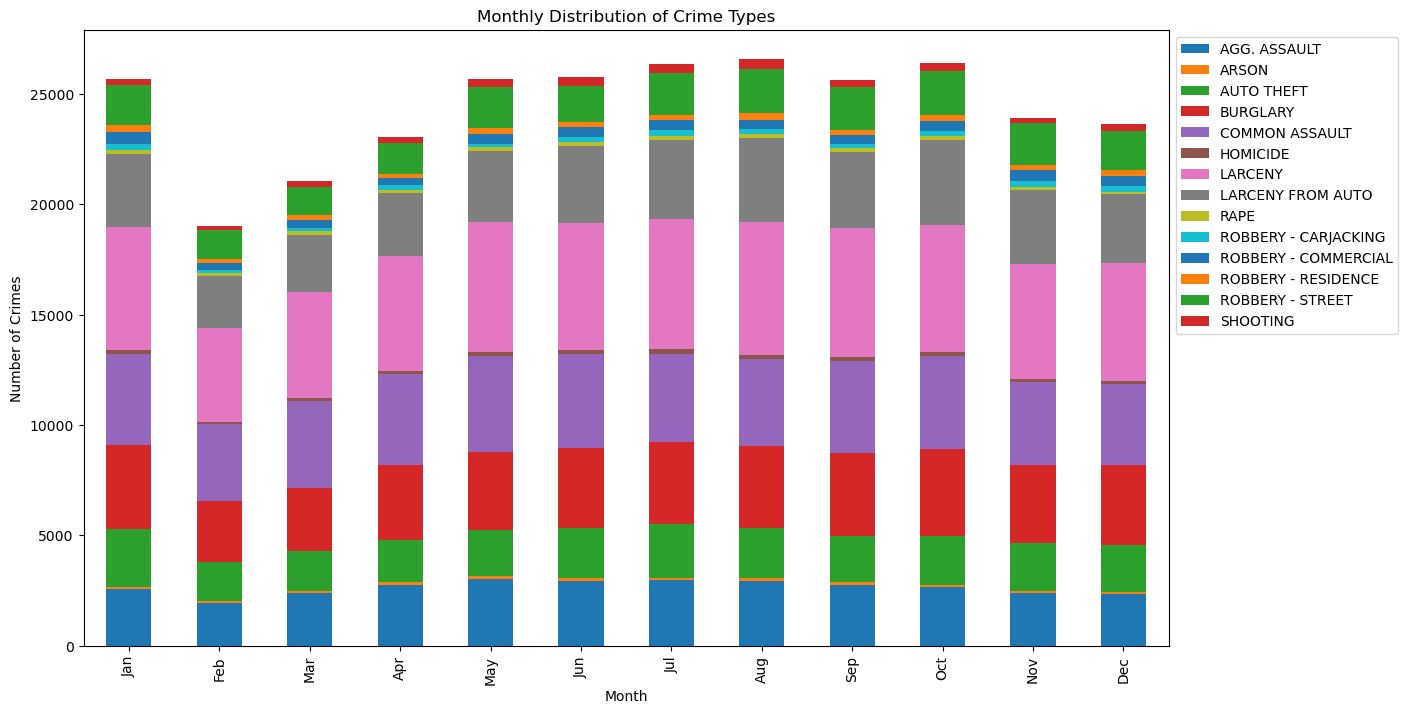

In [28]:
# month-to-month plot

monthly_data = df.groupby(['month', 'Description']).size().unstack().fillna(0)
monthly_data.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Monthly Distribution of Crime Types')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\14104\AppData\Local\Temp\ipykernel_15820\1677662800.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_data = df.groupby(['day_of_week', 'Description']).size().unstack().fillna(0)


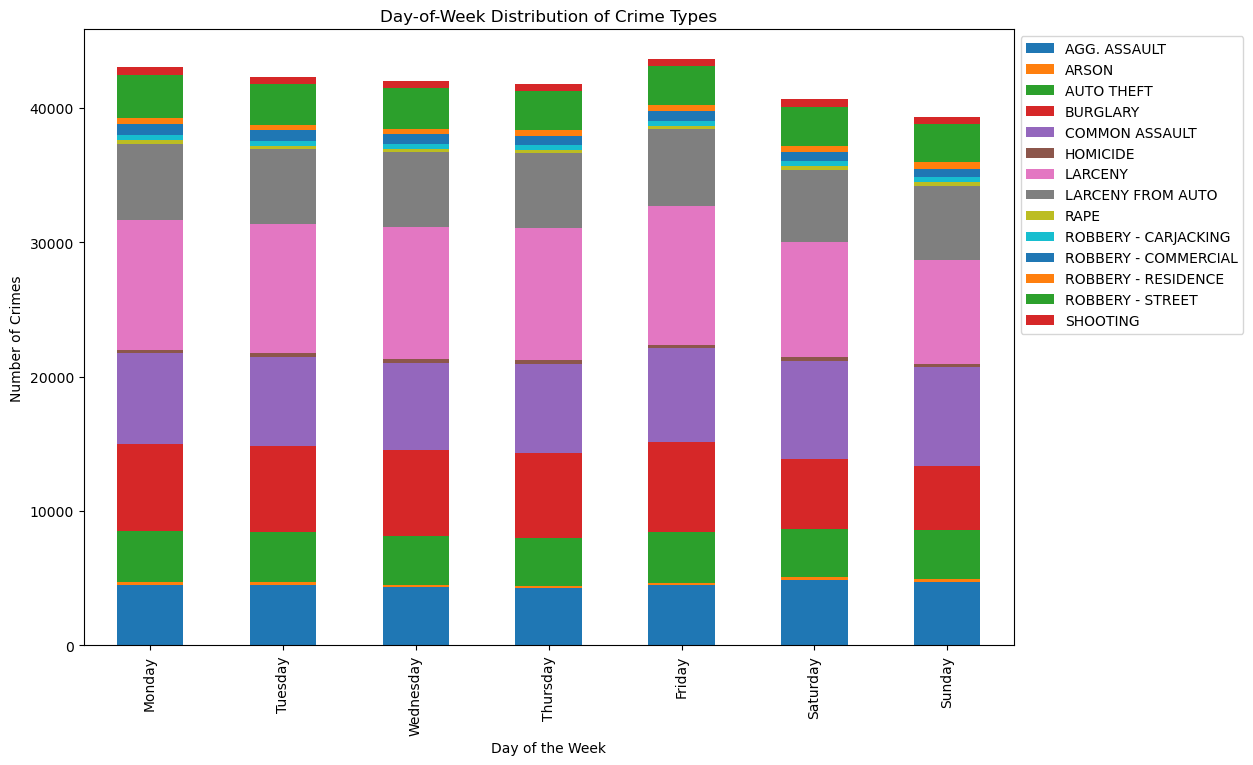

In [29]:
# day-of-week plot

day_data = df.groupby(['day_of_week', 'Description']).size().unstack().fillna(0)
day_data.plot(kind='bar', stacked=True, figsize=(12, 8))

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.title('Day-of-Week Distribution of Crime Types')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(7), labels=day_labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [30]:
# 5) Design a dashboard that allows users like Gary to explore the spatial and temporal patterns of crime. 
# For this task, I have used tableau. The whole interactive dashboard can be seen in this link:
# https://public.tableau.com/app/profile/maliha.momtaz/viz/IS733_HW1_Q5_Maliha_Momtaz/Sheet1